# STAT 207 Project 02 - Monroe County Collisions

Dashank Joshi(djosh4) and Andres Gomez (andresg4) collaborated on all parts of this project

## 1. Introduction

Every single day of our lives we take the very well known risk of driving. Each time we roll out the cars there is a chance that there will be a collision. The dataset presented in this report includes 53,943 collision reports in Monroe County, Indiana between the timeframe of 2003 and 2015. 

With this dataset we can answer intriguing questions such as what day of the week is statistically the safest to drive in or what hour of a particular day is the safest to drive in. Although this dataset is a sample of the larger population of collisions that occured in Monroe County, this report is extremely beneficial for those living in Monroe County, Indiana and as well as those that find themselves living in counties similar to Monroe County, Indiana. The results of any analysis done with this dataset will help people be more aware of the risks in driving and perhaps can lead to safer roads as a result of the aweareness.

One of the questions we will explore is if there exists a relationship between proportion of collisions that resulted in an injury and whether or not it happened during the daytime or nighttime. Another question we will explore is what is a range of reasonable values for the true population mean of longitude and latitude coordinates.

***

In [234]:
#Imports here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [235]:
df = pd.read_csv("cleaned_monroe_crash_data.csv")
df.head()

,Year,Month,Day,Weekend?,Hour,Collision Type,Injury Type,Primary Factor,Reported_Location,Latitude,Longitude
0,2015,1,5,Weekday,0.0,2-Car,No injury/unknown,OTHER (DRIVER) - EXPLAIN IN NARRATIVE,1ST & FESS,39.159207,-86.525874
1,2015,1,6,Weekday,1500.0,2-Car,No injury/unknown,FOLLOWING TOO CLOSELY,2ND & COLLEGE,39.161440,-86.534848
2,2015,1,6,Weekend,2300.0,2-Car,Non-incapacitating,DISREGARD SIGNAL/REG SIGN,BASSWOOD & BLOOMFIELD,39.149780,-86.568890
3,2015,1,7,Weekend,900.0,2-Car,Non-incapacitating,FAILURE TO YIELD RIGHT OF WAY,GATES & JACOBS,39.165655,-86.575956
4,2015,1,7,Weekend,1100.0,2-Car,No injury/unknown,FAILURE TO YIELD RIGHT OF WAY,W 3RD,39.164848,-86.579625


In [236]:
df.shape

(53943, 11)

## 2. Confidence Interval Analytical Tasks

Research questions:

What is the average longitude and latitude values in my sample data?

What is a range of reasonable values for the population longitude and latitude average?

---

We are interested in the true longitude and latitude average of all car crashes that occur in Monroe County. To do this, we will set up a 95% confidence interval to suggest that we are 95% confident that the true longitude and latitude average of all car crashes that occur in Monroe County is within our two intervals. Since we have a representative sample, we will have to take a resample of the sample data with replacement, take the longitude and latitude average, save it, and then repeat various times so that we can create a sampling distribution that should closely resemble a normal curve. From there we can take calculate our 95% confidence interval.

Before doing all of that, we will filter out the data and include only the interested variables and then clean the data accordingly.

In [237]:
# Interested in longitude and latitude only
df_coord = df[['Latitude', 'Longitude']]
df_coord.head()

,Latitude,Longitude
0,39.159207,-86.525874
1,39.161440,-86.534848
2,39.149780,-86.568890
3,39.165655,-86.575956
4,39.164848,-86.579625


In [238]:
# Cleaning is necessary
df_coord.isna().sum()

Latitude     4961
Longitude    4961
dtype: int64

In [239]:
df_coord.shape

(53943, 2)

We discovered some unreasonable values in our filtered data so we chose to omit them under the assumption that the unreasonable values were a typo

In [240]:
df_coord['Latitude'].describe()

count    48982.000000
mean        39.163677
std          0.198043
min          9.133739
25%         39.153414
50%         39.164655
75%         39.175552
max         41.228665
Name: Latitude, dtype: float64

In [241]:
df_coord['Longitude'].describe()

count    48982.000000
mean       -86.534262
std          0.783768
min        -88.959213
25%        -86.556592
50%        -86.533408
75%        -86.517517
max         86.596363
Name: Longitude, dtype: float64

In [242]:
cleaned_data = df_coord[df_coord['Latitude'] >= 36]
cleaned_data


,Latitude,Longitude
0,39.159207,-86.525874
1,39.161440,-86.534848
2,39.149780,-86.568890
3,39.165655,-86.575956
4,39.164848,-86.579625
...,...,...
53344,39.004275,-86.581375
53345,39.002752,-86.463856
53346,38.992326,-86.537252
53347,38.991520,-86.448784


In [243]:
cleaned_data['Latitude'].describe()

count    48980.000000
mean        39.164902
std          0.049577
min         38.019328
25%         39.153418
50%         39.164655
75%         39.175552
max         41.228665
Name: Latitude, dtype: float64

In [244]:
cleaned_data = df_coord[df_coord['Longitude'] <= -80]
cleaned_data

,Latitude,Longitude
0,39.159207,-86.525874
1,39.161440,-86.534848
2,39.149780,-86.568890
3,39.165655,-86.575956
4,39.164848,-86.579625
...,...,...
53344,39.004275,-86.581375
53345,39.002752,-86.463856
53346,38.992326,-86.537252
53347,38.991520,-86.448784


In [245]:
cleaned_data['Longitude'].describe()

count    48981.000000
mean       -86.537796
std          0.048209
min        -88.959213
25%        -86.556592
50%        -86.533408
75%        -86.517517
max        -84.944790
Name: Longitude, dtype: float64

Since we are interested in the average values of longitude and latitude then our statistic of interest would be the mean of longitude and latitude.

In [246]:
# Satistic of Interest
print(cleaned_data['Latitude'].mean())
print(cleaned_data['Longitude'].mean())

39.16367602407801
-86.53779617924704


<Axes: >

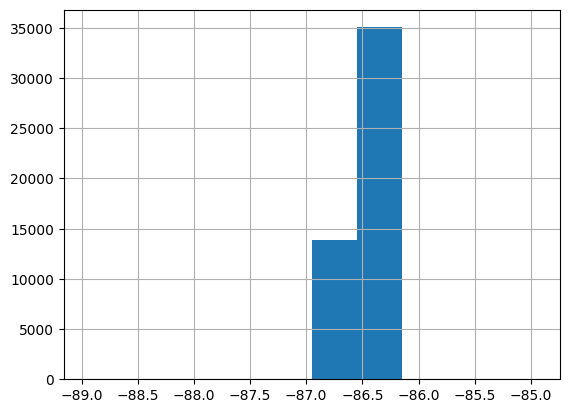

In [247]:
cleaned_data['Longitude'].hist()

<Axes: >

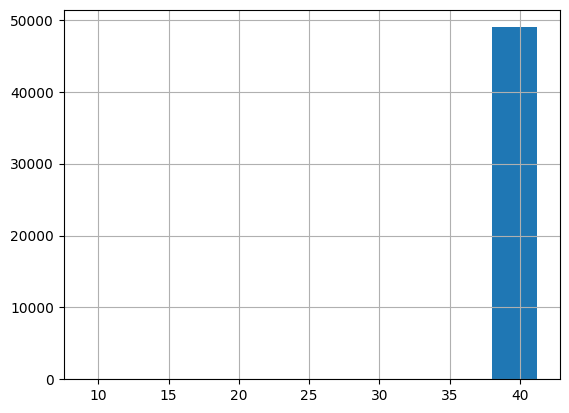

In [248]:
cleaned_data['Latitude'].hist()

From the generated graphs and the calculated means, we have a general idea of where the average collisions occur. However, since we only have a sample, we are interested in a range of reasonable values that includes the true population mean of each coordinate.

Thus, we can create a confidence interval of 95%.

In [249]:
samp_dist = []
for i in range(10000):
    lat_mean = cleaned_data['Latitude'].sample(48981, replace = True).mean()
    long_mean = cleaned_data['Longitude'].sample(48981, replace = True).mean()
    d = {"lat_mean" : lat_mean, "long_mean" : long_mean}
    samp_dist.append(d)

In [250]:
samp_dist = pd.DataFrame(samp_dist)
samp_dist

,lat_mean,long_mean
0,39.164841,-86.537611
1,39.163855,-86.537625
2,39.162811,-86.538103
3,39.163476,-86.537661
4,39.162343,-86.537994
...,...,...
9995,39.164512,-86.537881
9996,39.164799,-86.537789
9997,39.164886,-86.538323
9998,39.163981,-86.538001


In [251]:
print(f"Latitude lower Bound: {np.quantile(samp_dist[['lat_mean']], .025)}")

Latitude lower Bound: 39.16165591293552


In [252]:
print(f"Latitude higher Bound: {np.quantile(samp_dist[['lat_mean']], .975)}")

Latitude higher Bound: 39.16510027379021


In [253]:
print(f"Longitude lower Bound: {np.quantile(samp_dist[['long_mean']], .025)}")

Longitude lower Bound: -86.53823126877342


In [254]:
print(f"Longitude lower Bound: {np.quantile(samp_dist[['long_mean']], .975)}")

Longitude lower Bound: -86.53737991870703


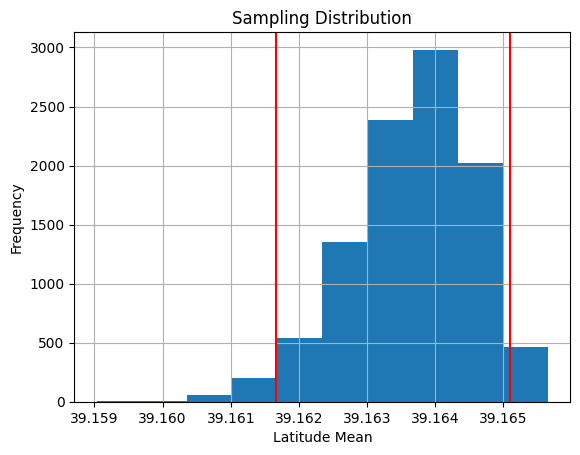

In [255]:
samp_dist[['lat_mean']].hist()
plt.xlabel("Latitude Mean")
plt.ylabel("Frequency")
plt.title("Sampling Distribution")
plt.axvline(np.quantile(samp_dist['lat_mean'], .025), color = "r")
plt.axvline(np.quantile(samp_dist['lat_mean'], .975), color = "r")
plt.show()

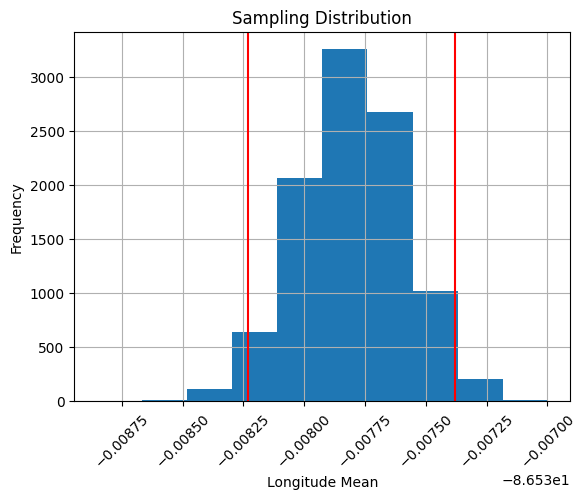

In [256]:
samp_dist['long_mean'].hist()
plt.xlabel("Longitude Mean")
plt.ylabel("Frequency")
plt.title("Sampling Distribution")
plt.axvline(np.quantile(samp_dist['long_mean'], .025), color = "r")
plt.axvline(np.quantile(samp_dist['long_mean'], .975), color = "r")
plt.xticks(rotation = 45)
plt.show()

We are 95% confident that the true longitude average of where car crashes occur in Monroe County is within -86.53822455905207 and -86.5373684944607.

We are also 95% confident that the true latitude average of where car crashes occur in Monroe County is within 39.161685270645265 and 39.16510707803356.

## 3. Hypothesis Testing Analytical Tasks

Research questions:

What is the difference in proportion between collisions that resulted in injury that happened during daytime vs those that occured during nighttime

Is there a relationship between proportion of collisions that resulted in injury that happened during daytime vs those that occured during nighttime

---

We are interested in looking for evidence to refute the claim that the proportion of collisions that occur in the daytime that result in an injury is the same as the proportion of those in the nighttime. Our claim is that the proportion of injuries that occur in the daytime is less than the proportion of injuires that occur in nighttime. To test this, we will perform a hypothesis test and look at the difference in proportion of injuries for daytime collisions, defined as 7 am to 7 pm, and nighttime collisions, defined as 7 pm to 7 am.

**Categorical Variable**: "Daytime?"

**Categorical Variable**: "Injury Type"

**null** = proportion of injuries that occur in daytime = proportion of injuries that occur in nighttime

**alt** = proportion of injuries that occur in daytime < proportion of injuries that occur in nighttime

We will classify the 'No injuries/unknown' to be no injuries and anything else as injuries

In [257]:
df_hyp = df[['Hour', 'Injury Type']]
df_hyp.head()

,Hour,Injury Type
0,0.0,No injury/unknown
1,1500.0,No injury/unknown
2,2300.0,Non-incapacitating
3,900.0,Non-incapacitating
4,1100.0,No injury/unknown


In [258]:
df_hyp['Hour'].unique()

array([   0., 1500., 2300.,  900., 1100., 1800., 1200., 1400., 1600.,
       1700., 1300.,  700., 2100., 2000., 1900.,  400., 1000.,  600.,
        800., 2200.,  100.,  200.,  300.,  500.,   nan])

In [259]:
# Cleaning is necessary
df_hyp.isna().sum()

Hour           225
Injury Type      0
dtype: int64

In [260]:
df_hyp = df_hyp.dropna()

In [261]:
df_hyp.isna().sum()

Hour           0
Injury Type    0
dtype: int64

In [262]:
def daytime_or_nighttime(Hour):
    if 700 < Hour < 1900:
        return True
    else:
        return False

In [263]:
df_hyp['Injury Type'].unique()

array(['No injury/unknown', 'Non-incapacitating', 'Incapacitating',
       'Fatal'], dtype=object)

In [264]:
def injury_or_not(injury_type):
    if injury_type == 'No injury/unknown':
        return False
    else:
        return True

In [265]:
df_hyp['Daytime?'] = df_hyp['Hour'].apply(daytime_or_nighttime)

In [266]:
df_hyp['Injury?'] = df_hyp['Injury Type'].apply(injury_or_not)

In [267]:
df_hyp.head()

,Hour,Injury Type,Daytime?,Injury?
0,0.0,No injury/unknown,False,False
1,1500.0,No injury/unknown,True,False
2,2300.0,Non-incapacitating,False,True
3,900.0,Non-incapacitating,True,True
4,1100.0,No injury/unknown,True,False


In [268]:
df_hyp = df_hyp[['Daytime?', 'Injury?']]
df_hyp.head()

,Daytime?,Injury?
0,False,False
1,True,False
2,False,True
3,True,True
4,True,False


### Sample 

In [269]:
# Proportion of injuries that occur during daytime
((df_hyp['Daytime?'] == True) & (df_hyp['Injury?'] == True)).mean()

0.16043039577050522

In [270]:
# Proportion of injuries that occur during nighttime
((df_hyp['Daytime?'] == False) & (df_hyp['Injury?'] == True)).mean()

0.06887821586805168

In [271]:
# Difference in proportion
original_diff_prop = ((df_hyp['Daytime?'] == True) & (df_hyp['Injury?'] == True)).mean() - ((df_hyp['Daytime?'] == False) & (df_hyp['Injury?'] == True)).mean()
original_diff_prop

0.09155217990245354

Assuming the skeptic's claim is true, that there is no relationship between injury and daytime or nighttime, then it would not matter if we shuffle our daytime variable and so we would expect the same results as above.

In [272]:
df_hyp_new = pd.DataFrame( {'shuffled_daytime' : df_hyp['Daytime?'].sample(len(df_hyp), replace = False)}).reset_index()
df_hyp_new.head()

,index,shuffled_daytime
0,43988,True
1,35941,True
2,21681,True
3,8857,True
4,29690,True


In [273]:
df_hyp['Daytime?'].value_counts()

True     37694
False    16024
Name: Daytime?, dtype: int64

In [274]:
df_hyp_new['shuffled_daytime'].value_counts()

True     37694
False    16024
Name: shuffled_daytime, dtype: int64

In [275]:
df_hyp_new['Injury?'] = df_hyp['Injury?']

In [276]:
df_hyp_new.head()

,index,shuffled_daytime,Injury?
0,43988,True,False
1,35941,True,False
2,21681,True,True
3,8857,True,True
4,29690,True,False


In [277]:
daytime_prop = ((df_hyp_new['shuffled_daytime'] == True) & (df_hyp_new['Injury?'] == True)).mean()
daytime_prop

0.15923898879332812

In [278]:
nighttime_prop = ((df_hyp_new['shuffled_daytime'] == False) & (df_hyp_new['Injury?'] == True)).mean()
nighttime_prop

0.06945530362262184

In [279]:
samp_dist1 = []
for i in range(1000):
    df_hyp_new = pd.DataFrame( {'shuffled_daytime' : df_hyp['Daytime?'].sample(len(df_hyp), replace = False)}).reset_index()
    df_hyp_new['Injury?'] = df_hyp['Injury?']
    daytime_prop = ((df_hyp_new['shuffled_daytime'] == True) & (df_hyp_new['Injury?'] == True)).mean()
    nighttime_prop = ((df_hyp_new['shuffled_daytime'] == False) & (df_hyp_new['Injury?'] == True)).mean()
    d = {'prop_diff' : daytime_prop - nighttime_prop}
    samp_dist1.append(d)

In [280]:
samp_dist1 = pd.DataFrame(samp_dist1)
samp_dist1.describe()

,prop_diff
count,1000.000000
mean,0.092255
std,0.001652
min,0.086209
25%,0.091124
50%,0.092204
75%,0.093358
max,0.097975


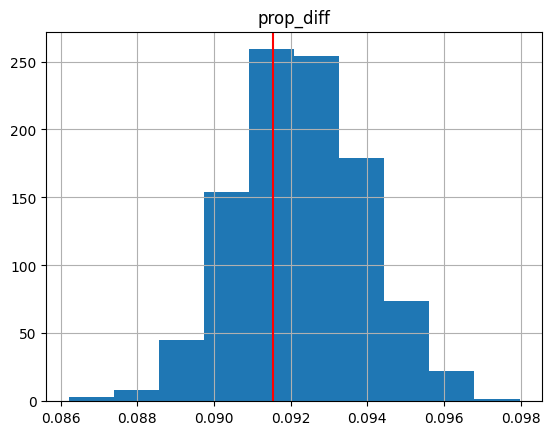

In [281]:
samp_dist1.hist()
plt.axvline(original_diff_prop, color = "r")

In [282]:
(samp_dist1 >= original_diff_prop).mean()

prop_diff    0.658
dtype: float64

In our sampling distribution for our hypothesis test we observe 65.8% of our repeated random samples have a difference in proportion between daytime collision injuries and nighttime collision injuries that is larger than 0.0915.

This suggests that my sample agrees with our skeptic's claim which means we fail to reject the skeptic's claim. Moving forward with the any analysis on this data, I would continue wokring under the assumption that there is no relationship between proportion of injuries that occur during daytime and nighttime for the population of all collisions that occur in Monroe County.

## 4. Conclusion

From our confidence interval we found that we are 95% confident that the crashes in Monroe County occure between -86.53822455905207 and -86.5373684944607. We also found that we are 95% confident that the true latitude average of where car crashes occur in Monroe County is within 39.161685270645265 and 39.16510707803356.In our sampling distribution used for hypothesis testing, we find that 67.6% of the repeated random samples show a difference in proportion between daytime and nighttime collision injuries larger than 0.0915. This indicates that our sample aligns with the skeptic's assertion, leading us to refrain from rejecting their claim. Consequently, in further analysis of this data, I would proceed under the assumption that there is no association between the proportion of injuries occurring during daytime and nighttime for all collisions in Monroe County. One challenge that we faced was during the process of cleaning data. The data provided had longitude and latitude numbers that exceded the longitude/latitude for Monroe County. When it comes to our hypothesis test, there was a lot of data that indicated that there were no injuries, which caused the results to be skewed. When doing further analysis, it might be more beneficial to include different city types. Since this data is based off Monroe, Indiana, a suburub, more urban/rural areas will fluctuate on the frequency of crashes. Our data is generally useful to understand the crashes that occur in suburbs similar to Monroe, Indiana. It might not be as useful for more populated areas such as cities. A specific research question that can be asked to further our analysis would be: if there exists a relationship between proportion of collisions that resulted in an injury and whether or not it happened in suburban/urban/rural area. 






